In [1]:
##import the relevent libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression

## LOAD THE DATA

In [3]:
data = pd.read_csv('C:/Users/ASUS/Downloads/1.01. Simple linear regression.csv')

In [4]:
data.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


### CREAT THE REGRESSION Declare the dependent and independent variables


In [6]:
x = data['SAT']
y = data['GPA']

In [7]:
x.shape 
#1D

(84,)

In [8]:
y.shape



(84,)

In [9]:
x_matrix = x.values.reshape(-1,1)
x_matrix.shape
#2D

(84, 1)

In [10]:
##REGRESSION ITSELF
reg =LinearRegression()

In [11]:
reg.fit(x_matrix,y)       
#x= input y= target

LinearRegression()

In [12]:
##R-squared

reg.score(x_matrix,y)

0.40600391479679765

In [13]:
#Coefficient

reg.coef_

array([0.00165569])

In [14]:
#Intercept

reg.intercept_




0.2750402996602803

In [15]:
new_data = pd.DataFrame(data=[1740,1760], columns=['SAT'])
new_data

,SAT
0,1740
1,1760


In [16]:
reg.predict(new_data)

array([3.15593751, 3.18905127])

In [17]:
new_data['Predicted_GPA'] = reg.predict(new_data)
new_data

,SAT,Predicted_GPA
0,1740,3.155938
1,1760,3.189051


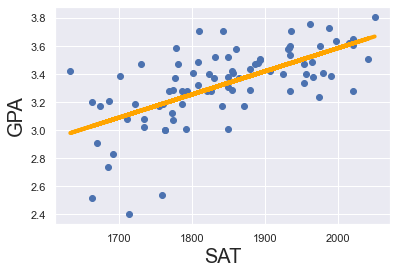

In [18]:
plt.scatter(x,y)
yhat = reg.coef_*x_matrix + reg.intercept_
#yhat = 0,0017*x + 0.275
fig = plt.plot(x, yhat, lw=4, c='orange', label='regression line')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize =20)
plt.show()

In [19]:
data = pd.read_csv('C:/Users/ASUS/Downloads/1.02. Multiple linear regression.csv')
data.head()

,SAT,GPA,"Rand 1,2,3"
0,1714,2.40,1
1,1664,2.52,3
2,1760,2.54,3
3,1685,2.74,3
4,1693,2.83,2


In [20]:
data.describe()

,SAT,GPA,"Rand 1,2,3"
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,2.059524
std,104.530661,0.271617,0.855192
min,1634.000000,2.400000,1.000000
25%,1772.000000,3.190000,1.000000
50%,1846.000000,3.380000,2.000000
75%,1934.000000,3.502500,3.000000
max,2050.000000,3.810000,3.000000


## Create the multiple linear regression

### Declare the dependent and independent variable

In [23]:
x = data[['SAT','Rand 1,2,3']]
y = data['GPA']

In [24]:
reg = LinearRegression()
reg.fit(x,y)

LinearRegression()

In [25]:
reg.coef_

array([ 0.00165354, -0.00826982])

In [26]:
reg.intercept_

0.29603261264909486

In [27]:
##CALCULATIONG THE R-SQUARED


In [28]:
reg.score(x,y)

0.40668119528142843

In [29]:
#CAlculation for adjusted R^2

In [30]:
x.shape

(84, 2)

In [31]:
r2 = reg.score(x,y)
n = x.shape[0]
p = x.shape[1]

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.39203134825134023

### Feature Selection

In [33]:
from sklearn.feature_selection import f_regression

In [119]:
f_regression(x,y)

(array([56.04804786,  0.17558437]), array([7.19951844e-11, 6.76291372e-01]))

In [120]:
p_values = f_regression(x,y)[1]
p_values

array([7.19951844e-11, 6.76291372e-01])

In [121]:
p_values.round(3)

array([0.   , 0.676])

### Creating a summary table

In [123]:
reg_summary = pd.DataFrame(data=['SAT', 'Rand 1,2,3'], columns = ['Features'])
reg_summary

,Features
0,SAT
1,"Rand 1,2,3"


In [124]:
reg_summary = pd.DataFrame(data = x.columns.values, columns = ['Features'])

In [125]:
reg_summary

,Features
0,SAT
1,"Rand 1,2,3"


In [126]:
reg_summary['Coefficients'] = reg.coef_
reg_summary['p-value'] = p_values.round(3)

In [127]:
reg_summary

,Features,Coefficients,p-value
0,SAT,0.001654,0.000
1,"Rand 1,2,3",-0.008270,0.676


In [128]:
#STANDARDIZATION

In [132]:
from sklearn.preprocessing import StandardScaler

In [134]:
scaler = StandardScaler()

In [135]:
scaler.fit(x)

StandardScaler()

In [136]:
x_scaled = scaler.transform(x)

In [137]:
x_scaled

array([[-1.26338288, -1.24637147],
       [-1.74458431,  1.10632974],
       [-0.82067757,  1.10632974],
       [-1.54247971,  1.10632974],
       [-1.46548748, -0.07002087],
       [-1.68684014, -1.24637147],
       [-0.78218146, -0.07002087],
       [-0.78218146, -1.24637147],
       [-0.51270866, -0.07002087],
       [ 0.04548499,  1.10632974],
       [-1.06127829,  1.10632974],
       [-0.67631715, -0.07002087],
       [-1.06127829, -1.24637147],
       [-1.28263094,  1.10632974],
       [-0.6955652 , -0.07002087],
       [ 0.25721362, -0.07002087],
       [-0.86879772,  1.10632974],
       [-1.64834403, -0.07002087],
       [-0.03150724,  1.10632974],
       [-0.57045283,  1.10632974],
       [-0.81105355,  1.10632974],
       [-1.18639066,  1.10632974],
       [-1.75420834,  1.10632974],
       [-1.52323165, -1.24637147],
       [ 1.23886453, -1.24637147],
       [-0.18549169, -1.24637147],
       [-0.5608288 , -1.24637147],
       [-0.23361183,  1.10632974],
       [ 1.68156984,

In [138]:
##REGRESSION WITH SCALED FEATURES

In [139]:
reg = LinearRegression()
reg.fit(x_scaled,y)

LinearRegression()

In [140]:
reg.coef_

array([ 0.17181389, -0.00703007])

In [141]:
reg.intercept_

3.330238095238095

In [142]:
##CREATING A SUMMARY TABLE

In [148]:
reg_summary = pd.DataFrame([['Bias'],['SAT'],['Rand 1,2,3']],columns = ['Features'])

In [149]:
reg_summary['weights'] = reg.intercept_, reg.coef_[0], reg.coef_[1]

In [150]:
reg_summary

,Features,weights
0,Bias,3.330238
1,SAT,0.171814
2,"Rand 1,2,3",-0.007030


In [151]:
#Making prediction with the standardized coefficients

In [152]:
new_data  = pd.DataFrame(data = [[1700,2],[1800,1]],columns = ['SAT', 'Rand 1,2,3'])

In [153]:
new_data

,SAT,"Rand 1,2,3"
0,1700,2
1,1800,1


In [154]:
reg.predict(new_data)

array([295.39979563, 312.58821497])

In [156]:
new_data_scaled = scaler.transform(new_data)
new_data_scaled

array([[-1.39811928, -0.07002087],
       [-0.43571643, -1.24637147]])

In [158]:
reg.predict(new_data_scaled)

array([3.09051403, 3.26413803])

In [159]:
##what if we we removed the 'Random 1,2,3' variable?

In [160]:
reg_simple = LinearRegression()
x_simple_matrix = x_scaled[:,0].reshape(-1,1)
reg_simple.fit(x_simple_matrix,y)

LinearRegression()

In [161]:
reg_simple.predict(new_data_scaled[:,0].reshape(-1,1))

array([3.08970998, 3.25527879])

In [162]:
#UNDERFITTING AND OVERFITTING
 

In [163]:
##TRAIN TEST SPLIT

In [164]:
#IMPORT THE RELEVANT  LIBRARiES

In [165]:
import numpy as np
from sklearn.model_selection import train_test_split


In [ ]:
#GENERATE SOME DATA WE ARE GOING TO SPLIT 

In [167]:
a = np.arange(1,101)

In [168]:
a

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

In [169]:

b = np.arange(501,601)
b

array([501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513,
       514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526,
       527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539,
       540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552,
       553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565,
       566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578,
       579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591,
       592, 593, 594, 595, 596, 597, 598, 599, 600])

In [170]:
#SPLIT THE DATA


In [171]:
train_test_split(a)

[array([ 58,  52,  36,  16,  25,  78,  94,  18,  69,  72,   1,   7,  60,
         13,  54,  67,  40, 100,  96,  83,   8,  21,  64,  14,  27,  59,
         19,  79,  48,  20,   4,  51,   6,  17,  85,  24,   3,  61,  47,
         92,  90,  66,  76,  99,  31,  28,  82,  12,  34,  65,  44,  50,
         43,  45,  35,  75,  98,  37,  29,  46,  41,  15,  23,  70,  80,
         89,   2,   5,  71,  38,  26,  95,  11,  22,  30]),
 array([93, 39, 10, 91, 42, 57, 74, 87, 33, 62, 55, 84, 97, 88, 68, 49, 73,
        81, 86, 77, 63, 32,  9, 56, 53])]

In [172]:
a_train, a_test = train_test_split(a)

### Explore the result

In [174]:
a_train.shape, a_test.shape

((75,), (25,))

In [175]:
a_train

array([ 86,  27,  97,  76,  22,  73,  62,  67,  70, 100,  84,  14,  88,
         3,  55,  52,  19,   1,  60,  25,  31,  10,   2,  49,  39,  17,
        41,  43,  75,  82,  74,  45,  95,  18,  36,  71,  54,  12,  72,
        69,  40,  21,  57,  98,  68,  29,  37,  66,  93,  28,  44,   8,
        64,  46,  77,  38,  20,  23,   6,  90,  42,  15,  13,  61,  78,
        96,  63,  24,  87,  59,  91,  47,  65,  89,  50])

In [176]:
a_test

array([56, 11, 79, 85, 33, 35, 80, 32, 83, 53,  4, 81, 30, 34, 92,  5, 51,
        7, 16,  9, 99, 94, 48, 26, 58])